# House price prediction

In [0]:
#@markdown Install Peltarion Sidekick
!pip install git+https://github.com/Peltarion/sidekick#egg=sidekick

  Cloning https://github.com/Peltarion/sidekick to /tmp/pip-install-w2q7gdhg/sidekick
  Running command git clone -q https://github.com/Peltarion/sidekick /tmp/pip-install-w2q7gdhg/sidekick
  Stored in directory: /tmp/pip-ephem-wheel-cache-tfrhlg67/wheels/b3/e4/bc/55cf1064c227ab7ff58d705ed4e6d11b0fbaddf04832692dad
Successfully built sidekick


In [0]:
import sidekick

#@markdown Configure Peltarion API
url = 'https://a.peltarion.com/deployment/54247cdc-b9f8-4b78-b5e2-3d01345f98f8/forward' #@param {type: "string"}
token = '126f0489-bb01-43c3-8cbf-868420cd475c' #@param {type: "string"}

client = sidekick.Deployment(
    url=url,
    token=token,
    dtypes_in={
        'housingMedianAge': 'Float (1)', 
        'households': 'Float (1)', 
        'totalBedrooms': 'Float (1)', 
        'totalRooms': 'Float (1)', 
        'medianIncome': 'Float (1)', 
        'image_path': 'Image (256x256x3)',
        'population': 'Float (1)'},
    dtypes_out={'medianHouseValue': 'Float (1)'}
)

Saving 15_5156_12286.png to 15_5156_12286.png
User uploaded file "15_5156_12286.png" with length 7246 bytes


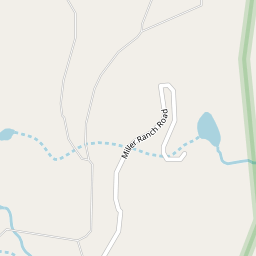

In [0]:
from PIL import Image
import requests
from io import BytesIO
from google.colab.patches import cv2_imshow
import cv2
from google.colab import files

#@markdown Upload map image

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

image = Image.open(fn)
image = image.convert('RGB')
image.format = 'PNG'
image.save(fn)

img = cv2.imread(fn, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [0]:
from PIL import Image
import requests
from io import BytesIO
import IPython

#@markdown Setup properties

housingMedianAge = 14  #@param {type: "slider", min: 1, max: 52}
households = 733  #@param {type: "slider", min: 1, max: 6082}
totalBedrooms = 2196  #@param {type: "slider", min: 1, max: 6445}
totalRooms = 12201  #@param {type: "slider", min: 2, max: 39320}
medianIncome = 56233  #@param {type: "slider", min: 4999, max: 150001}
population = 10300  #@param {type: "slider", min: 3, max: 35682}

# Get predictions from model
prediction=client.predict(
    image=image,
    housingMedianAge=float(housingMedianAge),
    households=float(households),
    totalBedrooms=float(totalBedrooms),
    totalRooms=float(totalRooms),
    medianIncome=float(medianIncome/1000),
    image_path=image,
    population=float(population)
)

houseMedianPrice = prediction["medianHouseValue"]
printText = '% 3.0f' % houseMedianPrice

html = "<h1>Predicted house median price= <i> $" + str(printText) + "</i></h1>"
IPython.display.HTML(html)